In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelmax, argrelmin

In [2]:
plt.rc('axes', labelsize=11)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=14)
plt.rc('axes', titleweight='bold')

# ELC run only using TESS sectors 1, 7, 8 and 10 , DBN, Schumacher and RVs

## Radial Velocities measurements and models

In [3]:
r1v7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCdataRV1.fold')
r2v7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCdataRV2.fold')

r1modv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/star1.RV')
r2modv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/star2.RV')

In [4]:
r1dat=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/allrvs1_24chiredScal.txt')
r2dat=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/allrvs2_24chiredScal.txt')

In [5]:
r1RESv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCresidualsRV1.fold')
r2RESv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCresidualsRV2.fold')

Text(0.5, 1.0, 'HARPS rvs')

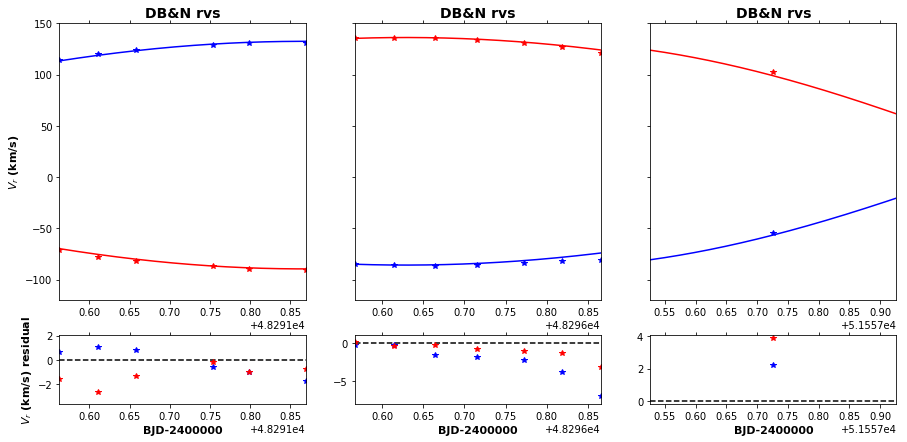

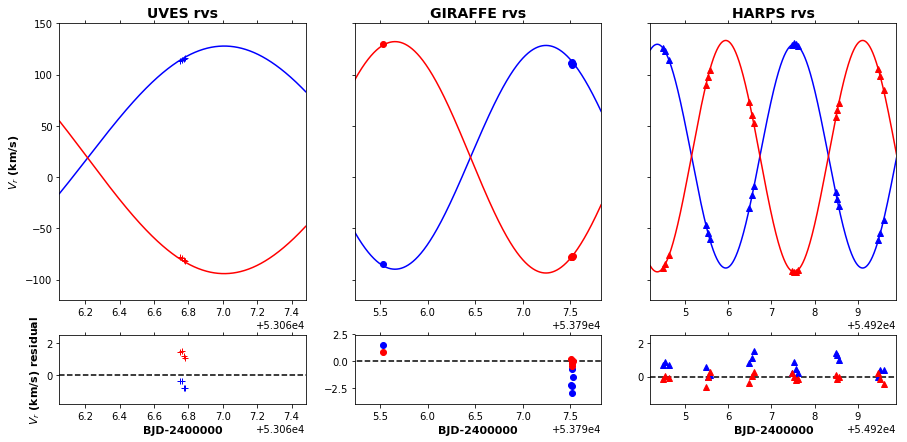

In [6]:
plt.rcParams['xtick.bottom'] =True
plt.rcParams['xtick.labelbottom'] = True
###plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.top'] = True
plt.rcParams["figure.figsize"] = [15, 7]


fig1, axs1 = plt.subplots(2, 3, sharex=False, sharey=False, gridspec_kw={'hspace': 0.2,'wspace': 0.2, 'height_ratios':[8,2]})
fig2, axs2 = plt.subplots(2, 3, sharex=False, sharey=False, gridspec_kw={'hspace': 0.2,'wspace': 0.2, 'height_ratios':[8,2]})


b1= r1v7[:,0][0:13] <48292
b2= r2v7[:,0][0:13] <48292


axs1[0, 0].plot(r1v7[:,0][0:13][b1],r1v7[:,1][0:13][b1], 'b*')
axs1[0, 0].plot(r2v7[:,0][0:13][b2],r2v7[:,1][0:13][b2], 'r*')
axs1[0, 0].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs1[0, 0].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs1[0,0].set_ylim([-120,150])
axs1[0,0].set_xlim([np.min(r1v7[:,0][0:13][b1]), np.max(r1v7[:,0][0:13][b1])])

b1res=r1RESv7[:,0][0:13] <48292
b2res=r2RESv7[:,0][0:13] <48292
axs1[1,0].plot(r1RESv7[:,0][0:13][b1res],r1RESv7[:,1][0:13][b1res],'b*')
axs1[1,0].plot(r2RESv7[:,0][0:13][b2res],r2RESv7[:,1][0:13][b2res],'r*')
ybnds=np.concatenate((r1RESv7[:,1][0:13][b1res],r2RESv7[:,1][0:13][b2res]))
axs1[1,0].set_ylim([min(ybnds)-1,max(ybnds)+1])
axs1[1,0].set_xlim([np.min(r1v7[:,0][0:13][b1]), np.max(r1v7[:,0][0:13][b1])])
axs1[1,0].hlines(y=0, xmin=np.min(r1v7[:,0][0:13][b1]), xmax=np.max(r1v7[:,0][0:13][b1]),linestyles='--')



b11= r1v7[:,0][0:13] >48292
b22= r2v7[:,0][0:13] >48292
axs1[0, 1].plot(r1v7[:,0][0:13][b11],r1v7[:,1][0:13][b11], 'b*')
axs1[0, 1].plot(r2v7[:,0][0:13][b22],r2v7[:,1][0:13][b22], 'r*')
axs1[0, 1].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs1[0, 1].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs1[0, 1].set_xlim([np.min(r1v7[:,0][0:13][b11]), np.max(r1v7[:,0][0:13][b11])])
axs1[0, 1].set_ylim([-120,150])
axs1[0,1].axes.yaxis.set_ticklabels([]) 

b11res=r1RESv7[:,0][0:13] >48292
b22res=r2RESv7[:,0][0:13] >48292
axs1[1,1].plot(r1RESv7[:,0][0:13][b11res],r1RESv7[:,1][0:13][b11res],'b*')
axs1[1,1].plot(r2RESv7[:,0][0:13][b22res],r2RESv7[:,1][0:13][b22res],'r*')
y1bnds=np.concatenate((r1RESv7[:,1][0:13][b11res],r2RESv7[:,1][0:13][b22res]))
axs1[1,1].set_ylim([min(y1bnds)-1,max(y1bnds)+1])
axs1[1,1].set_xlim([np.min(r1v7[:,0][0:13][b11]), np.max(r1v7[:,0][0:13][b11])])
axs1[1,1].hlines(y=0, xmin=np.min(r1v7[:,0][0:13][b11]), xmax=np.max(r1v7[:,0][0:13][b11]),linestyles='--')



axs1[0, 2].plot(r1v7[:,0][13],r1v7[:,1][13], 'b*')
axs1[0, 2].plot(r2v7[:,0][13],r2v7[:,1][13], 'r*')
axs1[0, 2].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs1[0, 2].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs1[0, 2].set_xlim([np.min(r1v7[:,0][13])-0.2, np.max(r1v7[:,0][13])+0.2])
axs1[0, 2].set_ylim([-120,150])
axs1[0,2].axes.yaxis.set_ticklabels([]) 

axs1[1,2].plot(r1RESv7[:,0][13],r1RESv7[:,1][13],'b*')
axs1[1,2].plot(r2RESv7[:,0][13],r2RESv7[:,1][13],'r*')
y11bnds=[r1RESv7[:,1][13],r2RESv7[:,1][13]]
#axs1[1,2].set_ylim([min(y11bnds)-1,max(y11bnds)+1])
axs1[1, 2].set_xlim([np.min(r1v7[:,0][13])-0.2, np.max(r1v7[:,0][13])+0.2])
axs1[1,2].hlines(y=0, xmin=np.min(r1v7[:,0][13])-0.2, xmax=np.max(r1v7[:,0][13])+0.2,linestyles='--')



axs1[0,0].set_title('DB&N rvs')
axs1[0,1].set_title('DB&N rvs')
axs1[0,2].set_title('DB&N rvs')



###### Bottom panel for UVES, GIRAFFE and HARPS #####
axs2[0,0].plot(r1v7[:,0][14:18],r1v7[:,1][14:18], 'b+')
axs2[0,0].plot(r2v7[:,0][14:18],r2v7[:,1][14:18], 'r+')
axs2[0,0].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs2[0,0].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs2[0,0].set_xlim([np.min(r1v7[:,0][14:18])-0.7, np.max(r1v7[:,0][14:18])+0.7])
axs2[0,0].set_ylim([-120,150])

axs2[1,0].plot(r1RESv7[:,0][14:18],r1RESv7[:,1][14:18],'b+')
axs2[1,0].plot(r2RESv7[:,0][14:18],r2RESv7[:,1][14:18],'r+')
yybnds=np.concatenate((r1RESv7[:,1][14:18],r2RESv7[:,1][14:18]))
axs2[1,0].set_ylim([min(yybnds)-1,max(yybnds)+1])
axs2[1,0].set_xlim([np.min(r1v7[:,0][14:18])-0.7, np.max(r1v7[:,0][14:18])+0.7])
axs2[1,0].hlines(y=0, xmin=np.min(r1v7[:,0][14:18])-0.7, xmax=np.max(r1v7[:,0][14:18])+0.7,linestyles='--')



axs2[0,1].plot(r1v7[:,0][18:24],r1v7[:,1][18:24], 'bo')
axs2[0,1].plot(r2v7[:,0][18:24],r2v7[:,1][18:24], 'ro')
axs2[0,1].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs2[0,1].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs2[0,1].set_xlim([np.min(r1v7[:,0][18:24])-0.3, np.max(r1v7[:,0][18:24])+0.3])
axs2[0,1].set_ylim([-120,150])
axs2[0,1].axes.yaxis.set_ticklabels([]) 

axs2[1,1].plot(r1RESv7[:,0][18:24],r1RESv7[:,1][18:24],'bo')
axs2[1,1].plot(r2RESv7[:,0][18:24],r2RESv7[:,1][18:24],'ro')
yy1bnds=np.concatenate((r1RESv7[:,1][18:24],r2RESv7[:,1][18:24]))
axs2[1,1].set_ylim([min(yy1bnds)-1,max(yy1bnds)+1])
axs2[1,1].set_xlim([np.min(r1v7[:,0][18:24])-0.3, np.max(r1v7[:,0][18:24])+0.3])
axs2[1,1].hlines(y=0, xmin=np.min(r1v7[:,0][18:24])-0.7, xmax=np.max(r1v7[:,0][18:24])+0.7,linestyles='--')




axs2[0,2].plot(r1v7[:,0][24:],r1v7[:,1][24:], 'b^')
axs2[0,2].plot(r2v7[:,0][24:],r2v7[:,1][24:], 'r^')
axs2[0,2].plot(r1modv7[:,0],r1modv7[:,1],'b')
axs2[0,2].plot(r2modv7[:,0],r2modv7[:,1],'r')
axs2[0,2].set_xlim([np.min(r1v7[:,0][24:])-0.3, np.max(r1v7[:,0][24:])+0.3])
axs2[0,2].set_ylim([-120,150])
axs2[0,2].axes.yaxis.set_ticklabels([]) 

axs2[1,2].plot(r1RESv7[:,0][24:],r1RESv7[:,1][24:],'b^')
axs2[1,2].plot(r2RESv7[:,0][24:],r2RESv7[:,1][24:],'r^')
yy11bnds=np.concatenate((r1RESv7[:,1][24:],r2RESv7[:,1][24:]))
axs2[1,2].set_ylim([min(yy11bnds)-1,max(yy11bnds)+1])
axs2[1,2].set_xlim([np.min(r1v7[:,0][24:])-0.3, np.max(r1v7[:,0][24:])+0.3])
axs2[1,2].hlines(y=0, xmin=np.min(r1v7[:,0][24:])-0.3, xmax=np.max(r1v7[:,0][24:])+0.3,linestyles='--')



#axs1[2,0].set_xlabel('BJD')
#axs1[2,1].set_xlabel('BJD')
##axs1[0,0].set_ylabel(r'$V_{r}$ (km/s)')
axs1[0,0].set_ylabel(r'$V_{r}$ (km/s)')
axs1[1,0].set_ylabel(r'$V_{r}$ (km/s) residual')

axs2[0,0].set_ylabel(r'$V_{r}$ (km/s)')
axs2[1,0].set_ylabel(r'$V_{r}$ (km/s) residual')

axs1[1,0].set_xlabel('BJD-2400000')
axs1[1,1].set_xlabel('BJD-2400000')
axs1[1,2].set_xlabel('BJD-2400000')

axs2[1,0].set_xlabel('BJD-2400000')
axs2[1,1].set_xlabel('BJD-2400000')
axs2[1,2].set_xlabel('BJD-2400000')



axs2[0,0].set_title('UVES rvs')
axs2[0,1].set_title('GIRAFFE rvs')
axs2[0,2].set_title('HARPS rvs')

**Phase fold radial velocity data using the best period and conjunction time of the binary:**

In [7]:
# period
per=3.174979637843495
# time periastron
T0=46133.5538869 
# time conjunction
Tconj=46133.6492155


ph1= np.remainder(((r1v7[:,0]-T0)/per),1) 
ph2= np.remainder(((r2v7[:,0]-T0)/per),1)

In [8]:
ph1res=np.remainder(((r1RESv7[:,0]-T0)/per),1) 
ph2res=np.remainder(((r2RESv7[:,0]-T0)/per),1) 

In [9]:
ma1=(r1modv7[:,0]>= np.min(r1v7[:,0][0:13]) -0.5) & (r1modv7[:,0]<= np.max(r1v7[:,0][0:13])+0.5 )
#ma1=(r1modv7[:,0]>= 48291.5) & (r1modv7[:,0]<= 48292)
#ma11=(r1modv7[:,0]>= 48296.5) & (r1modv7[:,0]<= 48297)


ma2=(r1modv7[:,0]>= np.min(r1v7[:,0][13:14]) -0.0 ) & (r1modv7[:,0]<= np.max(r1v7[:,0][13:14])+0.0)
ma3=(r1modv7[:,0]>= np.min(r1v7[:,0][14:18]) -1) & (r1modv7[:,0]<= np.max(r1v7[:,0][14:18])+1)
ma4=(r1modv7[:,0]>= np.min(r1v7[:,0][18:24]) -0.7 ) & (r1modv7[:,0]<= np.max(r1v7[:,0][18:24])+0.7)
ma5=(r1modv7[:,0]>= np.min(r1v7[:,0][24:]) -1) & (r1modv7[:,0]<= np.max(r1v7[:,0][24:])+1 )



In [10]:
mod1tim_fracs= np.concatenate([r1modv7[:,0][ma1],r1modv7[:,0][ma2],r1modv7[:,0][ma3],r1modv7[:,0][ma4],r1modv7[:,0][ma5]])

mod2tim_fracs= np.concatenate([r2modv7[:,0][ma1],r2modv7[:,0][ma2],r2modv7[:,0][ma3],r2modv7[:,0][ma4],r2modv7[:,0][ma5]])

mod1rvs_fracs= np.concatenate([r1modv7[:,1][ma1],r1modv7[:,1][ma2],r1modv7[:,1][ma3],r1modv7[:,1][ma4],r1modv7[:,1][ma5]])

mod2rvs_fracs= np.concatenate([r2modv7[:,1][ma1],r2modv7[:,1][ma2],r2modv7[:,1][ma3],r2modv7[:,1][ma4],r2modv7[:,1][ma5]])



In [11]:
ph1mod= np.remainder(((mod1tim_fracs-T0)/per),1) 
ph2mod= np.remainder(((mod2tim_fracs-T0)/per),1) 

Text(0, 0.5, 'O-C (km/s)')

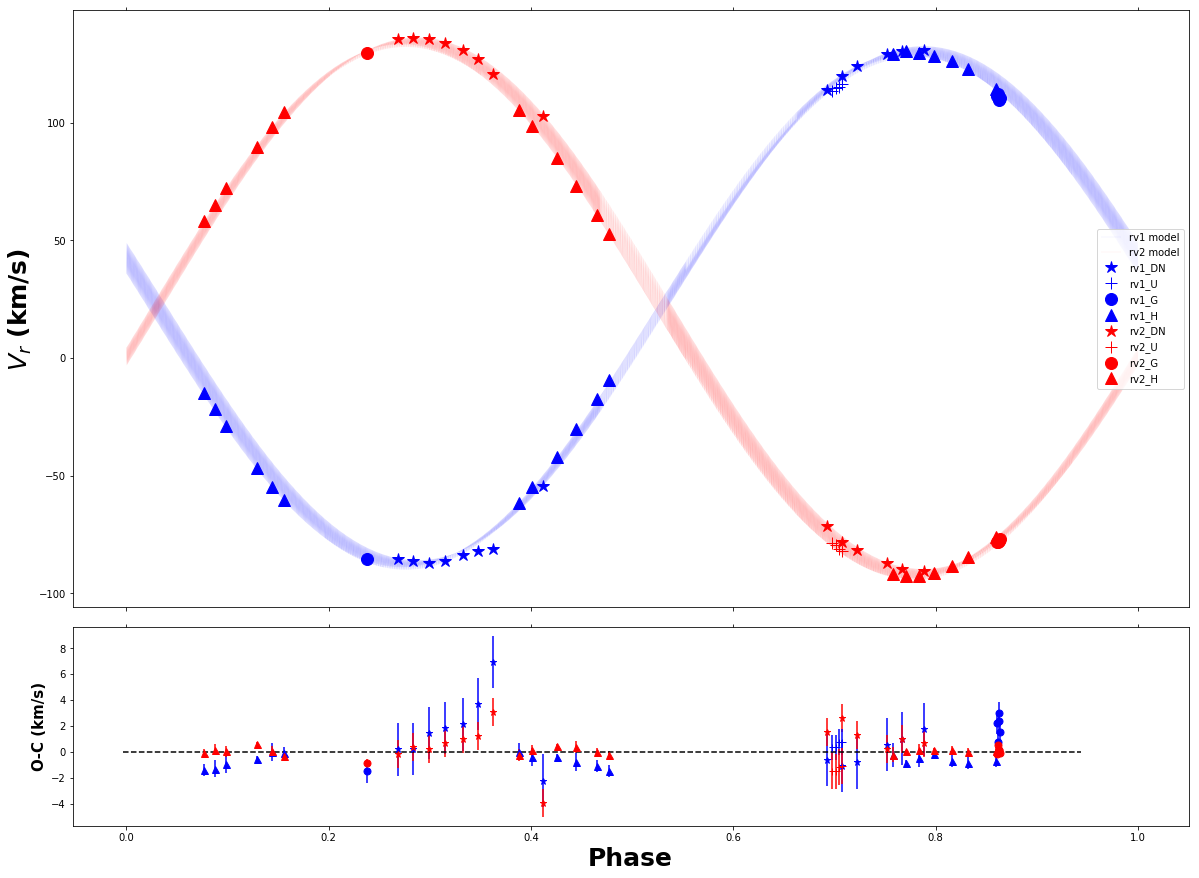

In [12]:
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')


plt.rcParams['xtick.bottom'] =True
plt.rcParams['xtick.labelbottom'] = True
#plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.top'] = True
plt.rcParams["figure.figsize"] = [20, 15]


fig,axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0.05, 'height_ratios':[3,1]})


axs[0].plot(ph1mod[np.argsort(ph1mod)],mod1rvs_fracs[np.argsort(ph1mod)], 'b-', label='rv1 model',alpha=0.4,lw=0.1)
axs[0].plot(ph2mod[np.argsort(ph2mod)],mod2rvs_fracs[np.argsort(ph2mod)],'r-', label='rv2 model',alpha=0.4,lw=0.1)


axs[0].plot(ph1[0:14],r1v7[:,1][0:14],'b*', label='rv1_DN', ms=12)
axs[0].plot(ph1[14:18],r1v7[:,1][14:18],'b+', label='rv1_U', ms=12)
axs[0].plot(ph1[18:24],r1v7[:,1][18:24],'bo', label='rv1_G', ms=12)
axs[0].plot(ph1[24:],r1v7[:,1][24:],'b^', label='rv1_H', ms=12)


axs[0].plot(ph2[0:14],r2v7[:,1][0:14],'r*', label='rv2_DN', ms=12)
axs[0].plot(ph2[14:18],r2v7[:,1][14:18],'r+', label='rv2_U', ms=12)
axs[0].plot(ph2[18:24],r2v7[:,1][18:24],'ro', label='rv2_G', ms=12)
axs[0].plot(ph2[24:],r2v7[:,1][24:],'r^', label='rv2_H', ms=12)


axs[1].errorbar(ph1res[0:14], -r1RESv7[:,1][0:14],yerr=r1RESv7[:,2][0:14],fmt='b*', label='rv1_DN', ms=7)
axs[1].errorbar(ph2res[0:14], -r2RESv7[:,1][0:14],yerr=r2RESv7[:,2][0:14],fmt='r*', label='rv2_DN', ms=7)

axs[1].errorbar(ph1res[14:18], -r1RESv7[:,1][14:18],yerr=r1RESv7[:,2][14:18],fmt='b+', label='rv1_U', ms=7)
axs[1].errorbar(ph2res[14:18], -r2RESv7[:,1][14:18],yerr=r2RESv7[:,2][14:18],fmt='r+', label='rv1_U', ms=7)

axs[1].errorbar(ph1res[18:24], -r1RESv7[:,1][18:24],yerr=r1RESv7[:,2][18:24],fmt='bo', label='rv1_G', ms=7)
axs[1].errorbar(ph2res[18:24], -r2RESv7[:,1][18:24],yerr=r2RESv7[:,2][18:24],fmt='ro', label='rv2_G', ms=7)

axs[1].errorbar(ph1res[24:], -r1RESv7[:,1][24:],yerr=r1RESv7[:,2][24:],fmt='b^', label='rv1_H', ms=7)
axs[1].errorbar(ph2res[24:], -r2RESv7[:,1][24:],yerr=r2RESv7[:,2][24:],fmt='r^', label='rv2_H', ms=7)

axs[1].hlines(y=0, xmin=min(ph1res)-0.08, xmax=max(ph1res)+0.08,linestyles='--')


axs[0].legend(loc = 'center right')
#axs[1].legend(loc = 'center right')


axs[0].set_ylabel(r'$V_{r}$ (km/s)', size=25)


# axs[0].set(xlabel='x-label', ylabel='Radial velocities (km/s)')
axs[1].set_xlabel('Phase', size=25)
axs[1].set_ylabel('O-C (km/s)', size=15)

## TESS data and models

In [13]:
Uv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCdataU.fold')
Umodv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/modelU.mag')
Uresv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/newest/ELCresidualsU.fold')

In [14]:
Vv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/ELCdataV.fold')
Vmodv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/modelV.mag')
Vresv7=np.loadtxt('/Users/jtorresh/Desktop/elc_3bodVer8/ELCresidualsV.fold')

In [15]:
# only use sectors 1,7,8,10
se=str(1)
tsec_eclTs=np.loadtxt('/Users/jtorresh/Desktop/eclip_tims/tsec'+se+'_stims.txt')
tsec_eclTp=np.loadtxt('/Users/jtorresh/Desktop/eclip_tims/tsec'+se+'_ptims.txt')

In [16]:
tmod_tmsv7=Umodv7[:,0][Umodv7[:,0]>min(Uv7[:,0])]
tmod_flxv7=Umodv7[:,1][Umodv7[:,0]>min(Uv7[:,0])]

[Text(0, 0.5, 'U mag (residuals)')]

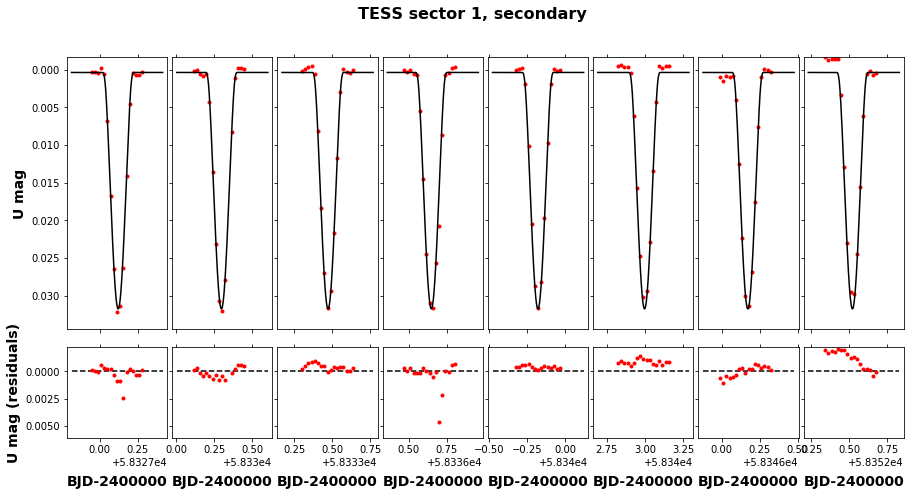

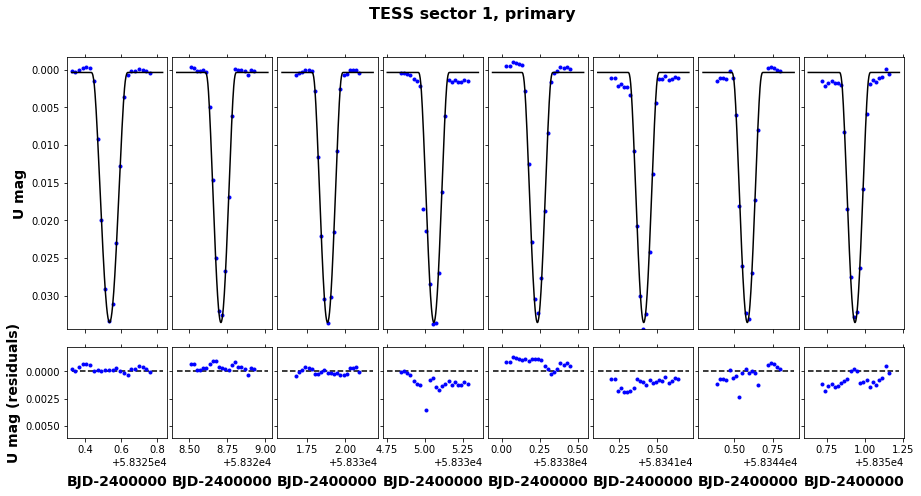

In [17]:
plt.rcParams['xtick.bottom'] =True
plt.rcParams['xtick.labelbottom'] = True
###plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.top'] = True
plt.rcParams["figure.figsize"] = [15, 7]

sec=str(se)

p=tsec_eclTp
s=tsec_eclTs


# maybe find a better way to automatically set the number of subplots
fig, axs = plt.subplots(2, len(p), sharex=False, sharey=False, gridspec_kw={'hspace': 0.1,'wspace': 0.05, 'height_ratios':[3,1]})
fig1, axs1 = plt.subplots(2, len(s), sharex=False, sharey=False, gridspec_kw={'hspace': 0.1,'wspace': 0.05, 'height_ratios':[3,1]})
fig.suptitle('TESS sector '+sec+', secondary',fontsize=16,fontweight="bold")
fig1.suptitle('TESS sector '+sec+', primary', fontsize=16, fontweight="bold")


tims=Uv7[:,0]
timsRes=Uresv7[:,0]
tmod=tmod_tmsv7


flux= Uv7[:,1]
fluxRes=Uresv7[:,1]
fmod=tmod_flxv7


for i in range(len(p[0:])):
    #print(tsec_eclTp[i]-tsec_eclTs[i])
    mp=(tims > p[i]-0.3) & (tims < p[i]+0.3)
    axs[0, i].plot(tims[mp],flux[mp],'r.')    
    
    axs[0, i].axes.xaxis.set_ticklabels([]) 
    
    if i>0:
        axs[0,i].axes.yaxis.set_ticklabels([])
        axs[1,i].axes.yaxis.set_ticklabels([])

    

    mmp= ( tmod> p[i]-0.3) & (tmod < p[i]+0.3)
    axs[0, i].plot(tmod[mmp],fmod[mmp],'k-')
    
    
    axs[1,i].plot(timsRes[mp],fluxRes[mp],'r.')
    axs[1,i].hlines(y=0, xmin=min(tmod[mmp]), xmax=max(tmod[mmp]),linestyles='--')

    
    axs[0,i].set_ylim([min(flux),max(flux)])
    axs[1,i].set_ylim([min(fluxRes),max(fluxRes)-0.005])
    

    axs[0, i].invert_yaxis()
    axs[1, i].invert_yaxis()

    
    axs[1,i].set(xlabel='BJD-2400000')
    axs[1,i].xaxis.labelpad = 20
    
    
for ii in range(len(s[0:])):
    #print(tsec_eclTp[i]-tsec_eclTs[i])
    ms=(tims > s[ii]-0.3) & (tims < s[ii]+0.3)
    axs1[0, ii].plot(tims[ms],flux[ms],'b.')
    
    axs1[0, ii].axes.xaxis.set_ticklabels([])
    
    if ii>0:
        axs1[0,ii].axes.yaxis.set_ticklabels([])
        axs1[1,ii].axes.yaxis.set_ticklabels([])


    
    mms= (tmod> s[ii]-0.3) & (tmod < s[ii]+0.3)
    axs1[0, ii].plot(tmod[mms],fmod[mms],'k-')
    
    
    axs1[1,ii].plot(timsRes[ms],fluxRes[ms],'b.')
    axs1[1,ii].hlines(y=0, xmin=min(tmod[mms]), xmax=max(tmod[mms]),linestyles='--')
    
    
    axs1[0,ii].set_ylim([min(flux),max(flux)])
    axs1[1,ii].set_ylim([min(fluxRes),max(fluxRes)-0.005])
    

    axs1[0, ii].invert_yaxis()
    axs1[1, ii].invert_yaxis()



    axs1[1,ii].set(xlabel='BJD-2400000')
    axs1[1,ii].xaxis.labelpad = 20    

        

axs[0,0].set(ylabel='U mag')
axs1[0,0].set(ylabel='U mag')


axs[1,0].set(ylabel='U mag (residuals)')
axs1[1,0].set(ylabel='U mag (residuals)')